In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = yf.download("INFY.NS", period="5y")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3000\1956484635.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("INFY.NS", period="5y")
[*********************100%***********************]  1 of 1 completed


In [3]:
print(df.columns) #Detected additional column

MultiIndex([( 'Close', 'INFY.NS'),
            (  'High', 'INFY.NS'),
            (   'Low', 'INFY.NS'),
            (  'Open', 'INFY.NS'),
            ('Volume', 'INFY.NS')],
           names=['Price', 'Ticker'])


In [4]:
df.columns = [col[0] for col in df.columns] #Flatten the dataset to make single column
df.head() 

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-22,631.173279,635.657955,627.854608,634.222825,7804096
2020-06-23,646.376465,649.829644,620.768917,623.997918,12157390
2020-06-24,640.546326,651.892524,636.285883,643.012898,10220838
2020-06-25,628.303101,632.877448,622.024554,632.204747,14945284
2020-06-26,671.086853,674.136400,636.823921,637.003319,26030458


In [5]:
df.isnull().sum() #No NaN values present (Happy happy happy)

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

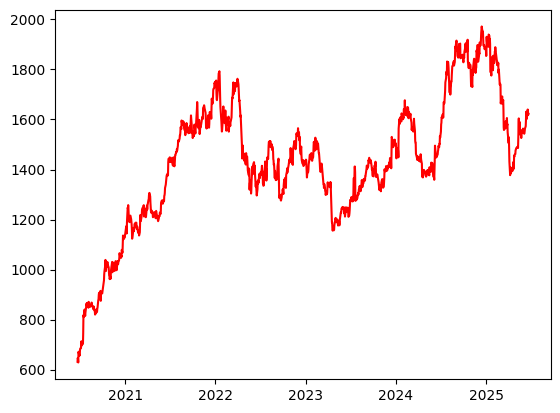

In [6]:
plt.plot(df.index, df["Close"], color="red")

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled #numpy array(can't use reshape, so convert back to Dataframe using pandas)

array([[0.0021361 , 0.00206616, 0.00533002, 0.00760915, 0.08629784],
       [0.01345093, 0.012597  , 0.        , 0.        , 0.13443665],
       [0.00911191, 0.0141299 , 0.01167223, 0.01415052, 0.11302222],
       ...,
       [0.74766196, 0.7518745 , 0.75239738, 0.74194657, 0.06225341],
       [0.73687047, 0.74095112, 0.74525126, 0.7441047 , 0.05692403],
       [0.74021955, 0.74147125, 0.74329549, 0.74045821, 0.10176497]],
      shape=(1240, 5))

In [26]:
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
scaled_df

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-22,0.002136,0.002066,0.005330,0.007609,0.086298
2020-06-23,0.013451,0.012597,0.000000,0.000000,0.134437
2020-06-24,0.009112,0.014130,0.011672,0.014151,0.113022
2020-06-25,0.000000,0.000000,0.000945,0.006107,0.165265
2020-06-26,0.031841,0.030659,0.012077,0.009678,0.287845
...,...,...,...,...,...
2025-06-16,0.740889,0.744518,0.734419,0.726319,0.061835
2025-06-17,0.752872,0.753881,0.748335,0.741723,0.084285
2025-06-18,0.747662,0.751874,0.752397,0.741947,0.062253


In [31]:
def create_sequences(data, window_size, horizon, target_col_index):
    X = []
    y = []
    for i in range(len(data) - window_size - horizon + 1):
        X_seq = data[i:i+window_size]
        y_value = data[i + window_size + horizon -1, target_col_index]
        X.append(X_seq)
        y.append(y_value)
    return np.array(X), np.array(y)

In [32]:
X, y = create_sequences(scaled_df.values, window_size=40, horizon=3, target_col_index=0)
print(X.shape)
print(y.shape)

(1198, 40, 5)
(1198,)


In [33]:
#we won't use train_test_split because even with shuffle = false, it can randomize the data, we don't want that here
n_total = len(X)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

X_train = X[:n_train]
y_train = y[:n_train]

X_val = X[n_train : n_train + n_val]
y_val = y[n_train : n_train + n_val]

X_test = X[n_train + n_val:]
y_test = y[n_train + n_val:]

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(838, 40, 5) (239, 40, 5) (121, 40, 5) (838,) (239,) (121,)


In [34]:
np.save("../data/X_train.npy", X_train)
np.save("../data/y_train.npy", y_train)
np.save("../data/X_val.npy", X_val)
np.save("../data/y_val.npy", y_val)
np.save("../data/X_test.npy", X_test)
np.save("../data/y_test.npy", y_test)
